# POOJA SHARMA 

## DATA SCIENCE INTERN AT LETSGROWMORE

## TASK 2 : Stock Market Prediction and Forecasting Using LSTM
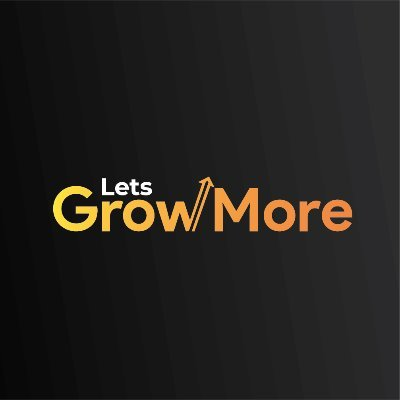

In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

In [2]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

In [3]:
#Read the dataset file of data
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
data.shape

(2035, 8)

In [7]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [11]:
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [12]:
data_Turnover = data['Turnover (Lacs)']

In [13]:
data_Turnover.shape

(2035,)

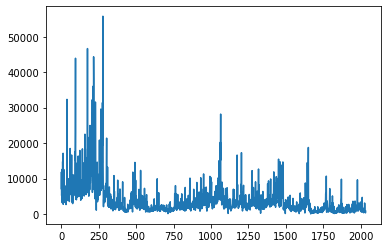

In [14]:
plt.plot(data_Turnover)

In [15]:
scaler = MinMaxScaler(feature_range = (0,1))
data_Turnover = scaler.fit_transform(np.array(data_Turnover).reshape(-1,1))

In [16]:
data_Turnover.shape

(2035, 1)

In [17]:
data_Turnover

array([[0.12788156],
       [0.21219178],
       [0.09353452],
       ...,
       [0.00544294],
       [0.00570964],
       [0.01375712]])

In [18]:
#Split the data into train and test split
training_size = int(len(data_Turnover) * 0.75)
test_size = len(data_Turnover) - training_size
train_data, test_data = data_Turnover[0:training_size,:], data_Turnover[training_size:len(data_Turnover),:1]

In [19]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [21]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [22]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 24s 344ms/step - loss: 0.0064 - val_loss: 0.0015
Epoch 2/100
23/23 [==============================] - 6s 266ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 6s 266ms/step - loss: 0.0045 - val_loss: 0.0012
Epoch 4/100
23/23 [==============================] - 6s 263ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 6s 268ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 6/100
23/23 [==============================] - 7s 296ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 7s 303ms/step - loss: 0.0044 - val_loss: 0.0010
Epoch 8/100
23/23 [==============================] - 8s 333ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 9/100
23/23 [==============================] - 7s 318ms/step - loss: 0.0046 - val_loss: 9.9557e-04
Epoch 10/100
23/23 [==============================] - 7s 288ms/step - loss: 0.0044 - v

Epoch 79/100
23/23 [==============================] - 6s 258ms/step - loss: 0.0036 - val_loss: 8.3648e-04
Epoch 80/100
23/23 [==============================] - 6s 262ms/step - loss: 0.0035 - val_loss: 7.8873e-04
Epoch 81/100
23/23 [==============================] - 6s 257ms/step - loss: 0.0035 - val_loss: 8.1139e-04
Epoch 82/100
23/23 [==============================] - 6s 257ms/step - loss: 0.0036 - val_loss: 7.8120e-04
Epoch 83/100
23/23 [==============================] - 6s 257ms/step - loss: 0.0035 - val_loss: 7.8570e-04
Epoch 84/100
23/23 [==============================] - 6s 256ms/step - loss: 0.0033 - val_loss: 8.3144e-04
Epoch 85/100
23/23 [==============================] - 6s 259ms/step - loss: 0.0033 - val_loss: 7.6996e-04
Epoch 86/100
23/23 [==============================] - 6s 258ms/step - loss: 0.0033 - val_loss: 8.1547e-04
Epoch 87/100
23/23 [==============================] - 6s 256ms/step - loss: 0.0034 - val_loss: 7.4124e-04
Epoch 88/100
23/23 [==========================

In [25]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [26]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

5819.7747827819

In [28]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

1838.3952133675425

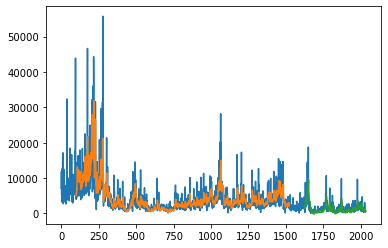

In [29]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(data_Turnover)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_Turnover)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_Turnover) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(data_Turnover))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [31]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 302)

In [32]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [33]:
lst_output=[]
n_steps=301
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.03100773 0.01530079 0.0095452  0.01300943 0.02771993 0.02462398
 0.01612548 0.00864226 0.00763308 0.03609405 0.00707922 0.00772371
 0.01824867 0.01178721 0.02969559 0.01450805 0.01799435 0.02972359
 0.0180683  0.01723912 0.02447825 0.02437397 0.02650757 0.05527779
 0.02594546 0.02073206 0.0278111  0.03533488 0.04122417 0.03124464
 0.03095461 0.0330218  0.06299181 0.1031271  0.05610086 0.04028121
 0.07187008 0.19110489 0.02458432 0.00861606 0.01125255 0.02673784
 0.0353058  0.06543123 0.05301766 0.04240296 0.02225168 0.01297641
 0.00974604 0.00997774 0.02122006 0.01424817 0.0138937  0.01116568
 0.01838381 0.01564018 0.01824149 0.02899241 0.02790084 0.06987809
 0.12824069 0.04039123 0.04062975 0.02023815 0.02103322 0.02026651
 0.01544581 0.02477869 0.0101468  0.01003338 0.02091621 0.02369215
 0.00968035 0.01247352 0.02465234 0.05497789 0.01000376 0.02005562
 0.09096515 0.00784216 0.00500215 0.01972898 0.05565343 0.03197151
 0.02511574 0.01144549 0.0060668  0.02151817 0.037

2 day output [[0.00186458]]
3 day input [0.01300943 0.02771993 0.02462398 0.01612548 0.00864226 0.00763308
 0.03609405 0.00707922 0.00772371 0.01824867 0.01178721 0.02969559
 0.01450805 0.01799435 0.02972359 0.0180683  0.01723912 0.02447825
 0.02437397 0.02650757 0.05527779 0.02594546 0.02073206 0.0278111
 0.03533488 0.04122417 0.03124464 0.03095461 0.0330218  0.06299181
 0.1031271  0.05610086 0.04028121 0.07187008 0.19110489 0.02458432
 0.00861606 0.01125255 0.02673784 0.0353058  0.06543123 0.05301766
 0.04240296 0.02225168 0.01297641 0.00974604 0.00997774 0.02122006
 0.01424817 0.0138937  0.01116568 0.01838381 0.01564018 0.01824149
 0.02899241 0.02790084 0.06987809 0.12824069 0.04039123 0.04062975
 0.02023815 0.02103322 0.02026651 0.01544581 0.02477869 0.0101468
 0.01003338 0.02091621 0.02369215 0.00968035 0.01247352 0.02465234
 0.05497789 0.01000376 0.02005562 0.09096515 0.00784216 0.00500215
 0.01972898 0.05565343 0.03197151 0.02511574 0.01144549 0.0060668
 0.02151817 0.0379317  0.

6 day output [[-0.00828327]]
7 day input [ 0.00864226  0.00763308  0.03609405  0.00707922  0.00772371  0.01824867
  0.01178721  0.02969559  0.01450805  0.01799435  0.02972359  0.0180683
  0.01723912  0.02447825  0.02437397  0.02650757  0.05527779  0.02594546
  0.02073206  0.0278111   0.03533488  0.04122417  0.03124464  0.03095461
  0.0330218   0.06299181  0.1031271   0.05610086  0.04028121  0.07187008
  0.19110489  0.02458432  0.00861606  0.01125255  0.02673784  0.0353058
  0.06543123  0.05301766  0.04240296  0.02225168  0.01297641  0.00974604
  0.00997774  0.02122006  0.01424817  0.0138937   0.01116568  0.01838381
  0.01564018  0.01824149  0.02899241  0.02790084  0.06987809  0.12824069
  0.04039123  0.04062975  0.02023815  0.02103322  0.02026651  0.01544581
  0.02477869  0.0101468   0.01003338  0.02091621  0.02369215  0.00968035
  0.01247352  0.02465234  0.05497789  0.01000376  0.02005562  0.09096515
  0.00784216  0.00500215  0.01972898  0.05565343  0.03197151  0.02511574
  0.01144549

10 day output [[-0.02047648]]
11 day input [ 0.00772371  0.01824867  0.01178721  0.02969559  0.01450805  0.01799435
  0.02972359  0.0180683   0.01723912  0.02447825  0.02437397  0.02650757
  0.05527779  0.02594546  0.02073206  0.0278111   0.03533488  0.04122417
  0.03124464  0.03095461  0.0330218   0.06299181  0.1031271   0.05610086
  0.04028121  0.07187008  0.19110489  0.02458432  0.00861606  0.01125255
  0.02673784  0.0353058   0.06543123  0.05301766  0.04240296  0.02225168
  0.01297641  0.00974604  0.00997774  0.02122006  0.01424817  0.0138937
  0.01116568  0.01838381  0.01564018  0.01824149  0.02899241  0.02790084
  0.06987809  0.12824069  0.04039123  0.04062975  0.02023815  0.02103322
  0.02026651  0.01544581  0.02477869  0.0101468   0.01003338  0.02091621
  0.02369215  0.00968035  0.01247352  0.02465234  0.05497789  0.01000376
  0.02005562  0.09096515  0.00784216  0.00500215  0.01972898  0.05565343
  0.03197151  0.02511574  0.01144549  0.0060668   0.02151817  0.0379317
  0.018216

14 day output [[-0.03560564]]
15 day input [ 0.01450805  0.01799435  0.02972359  0.0180683   0.01723912  0.02447825
  0.02437397  0.02650757  0.05527779  0.02594546  0.02073206  0.0278111
  0.03533488  0.04122417  0.03124464  0.03095461  0.0330218   0.06299181
  0.1031271   0.05610086  0.04028121  0.07187008  0.19110489  0.02458432
  0.00861606  0.01125255  0.02673784  0.0353058   0.06543123  0.05301766
  0.04240296  0.02225168  0.01297641  0.00974604  0.00997774  0.02122006
  0.01424817  0.0138937   0.01116568  0.01838381  0.01564018  0.01824149
  0.02899241  0.02790084  0.06987809  0.12824069  0.04039123  0.04062975
  0.02023815  0.02103322  0.02026651  0.01544581  0.02477869  0.0101468
  0.01003338  0.02091621  0.02369215  0.00968035  0.01247352  0.02465234
  0.05497789  0.01000376  0.02005562  0.09096515  0.00784216  0.00500215
  0.01972898  0.05565343  0.03197151  0.02511574  0.01144549  0.0060668
  0.02151817  0.0379317   0.01821636  0.00226264  0.00618256  0.00268459
  0.0032206

18 day output [[-0.05481898]]
19 day input [ 0.01723912  0.02447825  0.02437397  0.02650757  0.05527779  0.02594546
  0.02073206  0.0278111   0.03533488  0.04122417  0.03124464  0.03095461
  0.0330218   0.06299181  0.1031271   0.05610086  0.04028121  0.07187008
  0.19110489  0.02458432  0.00861606  0.01125255  0.02673784  0.0353058
  0.06543123  0.05301766  0.04240296  0.02225168  0.01297641  0.00974604
  0.00997774  0.02122006  0.01424817  0.0138937   0.01116568  0.01838381
  0.01564018  0.01824149  0.02899241  0.02790084  0.06987809  0.12824069
  0.04039123  0.04062975  0.02023815  0.02103322  0.02026651  0.01544581
  0.02477869  0.0101468   0.01003338  0.02091621  0.02369215  0.00968035
  0.01247352  0.02465234  0.05497789  0.01000376  0.02005562  0.09096515
  0.00784216  0.00500215  0.01972898  0.05565343  0.03197151  0.02511574
  0.01144549  0.0060668   0.02151817  0.0379317   0.01821636  0.00226264
  0.00618256  0.00268459  0.00322068  0.00294214  0.00304803  0.0035143
  0.016987

22 day output [[-0.08025803]]
23 day input [ 0.05527779  0.02594546  0.02073206  0.0278111   0.03533488  0.04122417
  0.03124464  0.03095461  0.0330218   0.06299181  0.1031271   0.05610086
  0.04028121  0.07187008  0.19110489  0.02458432  0.00861606  0.01125255
  0.02673784  0.0353058   0.06543123  0.05301766  0.04240296  0.02225168
  0.01297641  0.00974604  0.00997774  0.02122006  0.01424817  0.0138937
  0.01116568  0.01838381  0.01564018  0.01824149  0.02899241  0.02790084
  0.06987809  0.12824069  0.04039123  0.04062975  0.02023815  0.02103322
  0.02026651  0.01544581  0.02477869  0.0101468   0.01003338  0.02091621
  0.02369215  0.00968035  0.01247352  0.02465234  0.05497789  0.01000376
  0.02005562  0.09096515  0.00784216  0.00500215  0.01972898  0.05565343
  0.03197151  0.02511574  0.01144549  0.0060668   0.02151817  0.0379317
  0.01821636  0.00226264  0.00618256  0.00268459  0.00322068  0.00294214
  0.00304803  0.0035143   0.0169875   0.00917566  0.01074463  0.00493826
  0.006178

26 day output [[-0.11574352]]
27 day input [ 0.03533488  0.04122417  0.03124464  0.03095461  0.0330218   0.06299181
  0.1031271   0.05610086  0.04028121  0.07187008  0.19110489  0.02458432
  0.00861606  0.01125255  0.02673784  0.0353058   0.06543123  0.05301766
  0.04240296  0.02225168  0.01297641  0.00974604  0.00997774  0.02122006
  0.01424817  0.0138937   0.01116568  0.01838381  0.01564018  0.01824149
  0.02899241  0.02790084  0.06987809  0.12824069  0.04039123  0.04062975
  0.02023815  0.02103322  0.02026651  0.01544581  0.02477869  0.0101468
  0.01003338  0.02091621  0.02369215  0.00968035  0.01247352  0.02465234
  0.05497789  0.01000376  0.02005562  0.09096515  0.00784216  0.00500215
  0.01972898  0.05565343  0.03197151  0.02511574  0.01144549  0.0060668
  0.02151817  0.0379317   0.01821636  0.00226264  0.00618256  0.00268459
  0.00322068  0.00294214  0.00304803  0.0035143   0.0169875   0.00917566
  0.01074463  0.00493826  0.00617879  0.00855845  0.00513388  0.01112674
  0.006043

In [34]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [35]:
df = data_Turnover.tolist()
df.extend(lst_output)

In [36]:
len(data_Turnover)

2035